## Exploratory Data Analysis

In [8]:
#Import library for data preparation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import statistics

# import scipy stats for statistics
from scipy.stats import ttest_ind 
from scipy.stats import t  
import scipy.stats as scs
import yaml
import matplotlib.pyplot as plt

# Import Data

Import data dengan format pickle dan akan diload menjadi dataframe sesuai dengan format save sebelumnya

In [9]:
# Import data that was previously created during the data preparation process
X_train = joblib.load("C:\\Users\\penguin\\code\\product-classification\\dataset\\2 - processed\\X_train.pkl")
y_train = joblib.load("C:\\Users\\penguin\\code\\product-classification\\dataset\\2 - processed\\y_train.pkl")

In [10]:
# Sanity Check
X_train

,title
13454,Eurosafe Trailing Socket Neon & Surge 5m Green...
14181,La Boheme Classic Ring Donut
819,TOPVALU Himalaya Rock Salt (Pouch)
12466,Russell Taylors Air Fryer Touch Screen (Z4C)
4609,O&T Cookies Chocolate Chip Raisin
...,...
5191,Lazat Springroll Vegetable
13418,Baba Microgreen Cultivation Box (MT-3003)
5390,Marina Chicken Fries With Black Pepper
860,Knorr Ikan Bilis Seasoning Powder


In [11]:
# Sanity Check
y_train

13454                   Hardware
14181                      Bread
819      Spices & Dry condiments
12466                  Appliance
4609           Biscuit & Cookies
                  ...           
5191                 Frozen food
13418                  Gardening
5390                 Frozen food
860      Spices & Dry condiments
7270                      Coffee
Name: category, Length: 11408, dtype: object

In [12]:
# Combine x_train and y_train for EDA purposes
df = pd.merge(X_train, y_train, left_index=True, right_index=True)
# Sanity Check Data
df

,title,category
13454,Eurosafe Trailing Socket Neon & Surge 5m Green...,Hardware
14181,La Boheme Classic Ring Donut,Bread
819,TOPVALU Himalaya Rock Salt (Pouch),Spices & Dry condiments
12466,Russell Taylors Air Fryer Touch Screen (Z4C),Appliance
4609,O&T Cookies Chocolate Chip Raisin,Biscuit & Cookies
...,...,...
5191,Lazat Springroll Vegetable,Frozen food
13418,Baba Microgreen Cultivation Box (MT-3003),Gardening
5390,Marina Chicken Fries With Black Pepper,Frozen food
860,Knorr Ikan Bilis Seasoning Powder,Spices & Dry condiments


## Descriptive Statistics

In [13]:
# Descriptive Statistics
print(df.describe())

                                                    title       category
count                                               11408          11408
unique                                              11408             77
top     Eurosafe Trailing Socket Neon & Surge 5m Green...  Sauce & Paste
freq                                                    1            614


## View the "title" with the longest name

In [14]:
product_with_longest_title = df.sort_values(by='title', key=lambda x: -x.str.len()).head(10)
product_with_longest_title

,title,category
9229,Home Perfect Non-Stick Induction Fast Heat Pae...,Pot & Pan
9228,Home Perfect Non-Stick Induction Fast Heat Pae...,Pot & Pan
9225,Home Perfect Non-Stick Induction Extra Deep Fa...,Pot & Pan
9223,Home Perfect Non-Stick Induction Extra Deep Fa...,Pot & Pan
9589,Eplas Heavy Duty Sport Drinking Bottle With Sp...,Drinkware
13220,Home Coordy Cool & Dry Double Sided Lightweigh...,Bedding
9588,Eplas One Touch Multicolour Water Bottle With ...,Drinkware
9208,Home Coordy Compatible Lightweight Ceramic Coa...,Pot & Pan
9206,Home Coordy Compatible Lightweight Ceramic Coa...,Pot & Pan
9207,Home Coordy Compatible Lightweight Ceramic Coa...,Pot & Pan


## View the "title" with the shortest name

In [15]:
product_with_shortest_titles = df.sort_values(by='title', key=lambda x: x.str.len()).head(10)
product_with_shortest_titles

,title,category
9544,CK Mug,Drinkware
4716,A1 Kuaci,Nuts & Seeds
6450,Boh Cham,Tea
3182,L&P Sauce,Sauce & Paste
1546,Eva Honey,Cereal & Breakfast
9215,Glass Lid,Pot & Pan
5200,Kawan Bun,Frozen food
6612,Vico Vico,Chocolate & Nutritious drink
6750,7 Up Zero,Carbonated & Packed drink
9657,Glass Jug,Drinkware


## View products with titles that contain specific characteristics

In [ ]:
# Products with titles that contain specific characteristics (e.g., "Vintage" in the title)
products_with_specific_characteristic = df[df['title'].str.contains("Vintage")]
print("\nProducts with Specific Characteristics:")

products_with_specific_characteristic.head()

# Find rows containing punctuation or special characters

Punctuation or special characters in product titles can interfere with modeling and data analysis. Therefore, identifying rows containing special characters allows for effective data cleaning before further analysis. When performing text analysis, such as NLP (Natural Language Processing) modeling or text feature extraction, special characters in the text can significantly impact the analysis results. They can be part of keywords or features to be extracted.

In [17]:
# Find rows containing punctuation or special characters
special_character_rows = df[df['title'].str.contains(r'[^\w\s]')]

special_character_rows

,title,category
13454,Eurosafe Trailing Socket Neon & Surge 5m Green...,Hardware
819,TOPVALU Himalaya Rock Salt (Pouch),Spices & Dry condiments
12466,Russell Taylors Air Fryer Touch Screen (Z4C),Appliance
4609,O&T Cookies Chocolate Chip Raisin,Biscuit & Cookies
13951,Faber-Castell 2-Hole Paper Punch Green,Stationery
...,...,...
2433,Lady's Choice Mayonnaise,Sauce & Paste
13803,Unicorn Black Double Sided Foam Tape (UFT-12MM...,Stationery
769,Leggo's Napoli,Noodles & Pasta
11964,Nivea Men Deodorant Spray Black & White Fresh,Deodorants


# Find rows with multiple spaces in the title column

Double spaces can accidentally appear due to input errors or inconsistent data processing. This can disrupt data consistency, affecting analysis results. Double spaces can influence word search or tokenization, potentially causing errors in keyword matching or text modeling. Double spaces can be considered noise as they do not convey meaningful semantic information. Identifying and removing double spaces can help clean the text.

In [18]:
import re
# Find rows with multiple spaces in the title column
rows_with_multiple_spaces = df[df['title'].str.contains(r'\s\s+', regex=True)]
rows_with_multiple_spaces

,title,category
13576,Faber-Castell True Gel Pen 0.5mm (2 Pcs) - Bl...,Stationery
9119,Elianware Air Tight Food Rectangular Keeper (...,Food storage
13814,Unicorn Emboss Book Wrapper,Stationery
13685,Parker Quinkflow Ballpoint PenRefill 0.7mm Blue,Stationery
449,Samyang Buldak Cream Carbonara Hot Chicken Ramen,Noodles & Pasta
11317,Intimate Nite Long Maxi Cottony - M100,Sanitary
10109,Nan Hypoallergenic Step 1 Scoop,Milk powder
12159,SILKYGIRL Natural Brown Pencil,Cosmetic
229,Pure South New Zealand Defrosted Lamb Shoulder...,Meat & Poultry
12548,"Midea Circulation Table Fan 6"" (MFG150M0APB)",Appliance


## Find rows with uppercase letters in the title column

In text processing, we often want to normalize the text to maintain consistency and make it easier for the model to understand. One form of normalization is converting all letters to lowercase or uppercase (usually lowercase). This helps the model understand the text without considering case differences. Some text modeling models may better understand text converted to lowercase. Checking for the presence of uppercase letters can help identify data that is inconsistent or does not conform to certain rules.

In [19]:
# Find rows with uppercase letters in the title column
rows_with_uppercase = df[df['title'].str.contains(r'[A-Z]')]

rows_with_uppercase

,title,category
13454,Eurosafe Trailing Socket Neon & Surge 5m Green...,Hardware
14181,La Boheme Classic Ring Donut,Bread
819,TOPVALU Himalaya Rock Salt (Pouch),Spices & Dry condiments
12466,Russell Taylors Air Fryer Touch Screen (Z4C),Appliance
4609,O&T Cookies Chocolate Chip Raisin,Biscuit & Cookies
...,...,...
5191,Lazat Springroll Vegetable,Frozen food
13418,Baba Microgreen Cultivation Box (MT-3003),Gardening
5390,Marina Chicken Fries With Black Pepper,Frozen food
860,Knorr Ikan Bilis Seasoning Powder,Spices & Dry condiments


## Check Proportion of Data Both in Count and Percentage of Target Labels

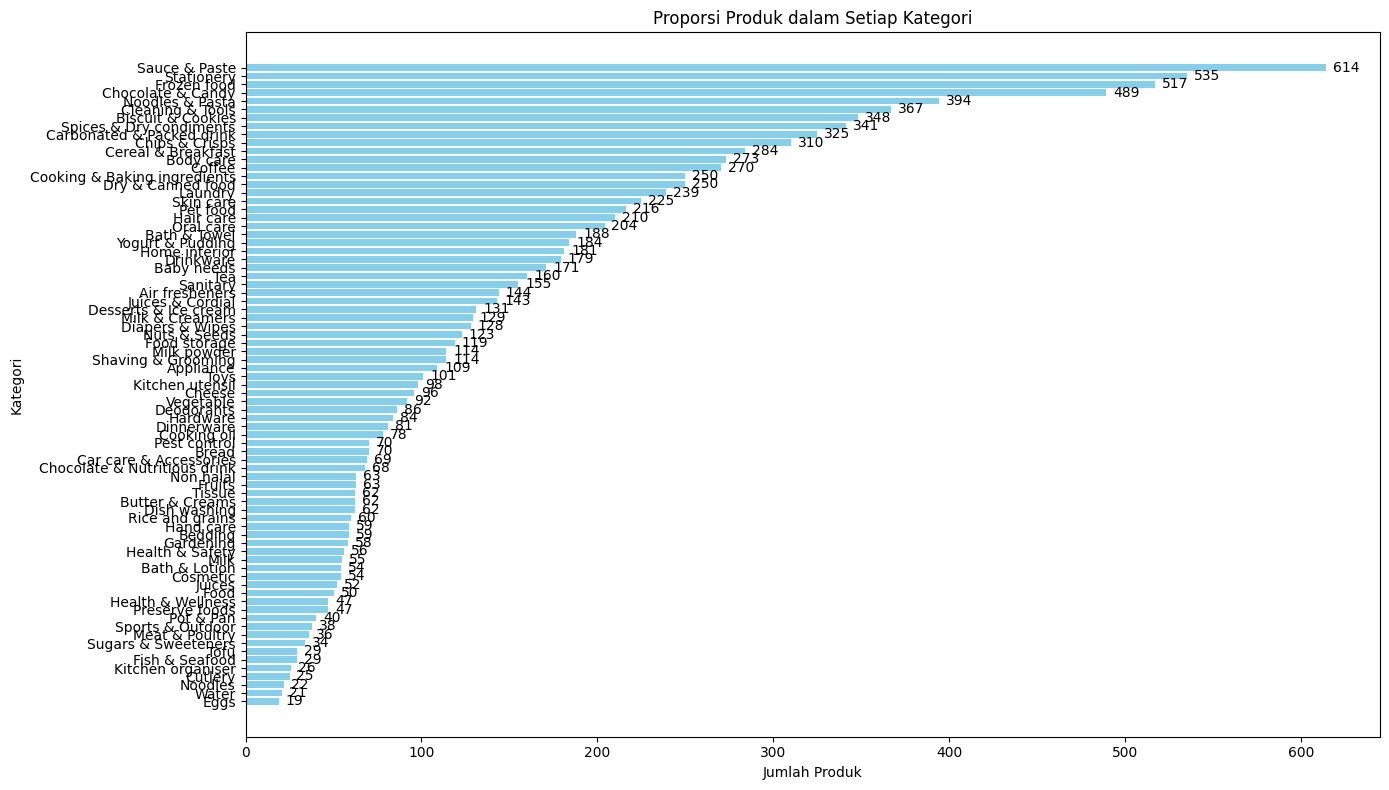

In [20]:
# count the number of products in each category
category_counts = df['category'].value_counts()

# prepare data for visualization
categories = category_counts.index
product_counts = category_counts.values

# do visualization using matplotlib
plt.figure(figsize=(14, 8))
bars = plt.barh(categories, product_counts, color='skyblue')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.title('Proporsi Produk dalam Setiap Kategori')

plt.gca().invert_yaxis()  # for the largest bar to be at the top

# show labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.gca().annotate(f'{int(width)}', 
                 xy=(width, bar.get_y() + bar.get_height()/2), 
                 xytext=(5, 0), 
                 textcoords='offset points', 
                 fontsize=10, 
                 va='center')

plt.tight_layout()

# show the plot
plt.show()

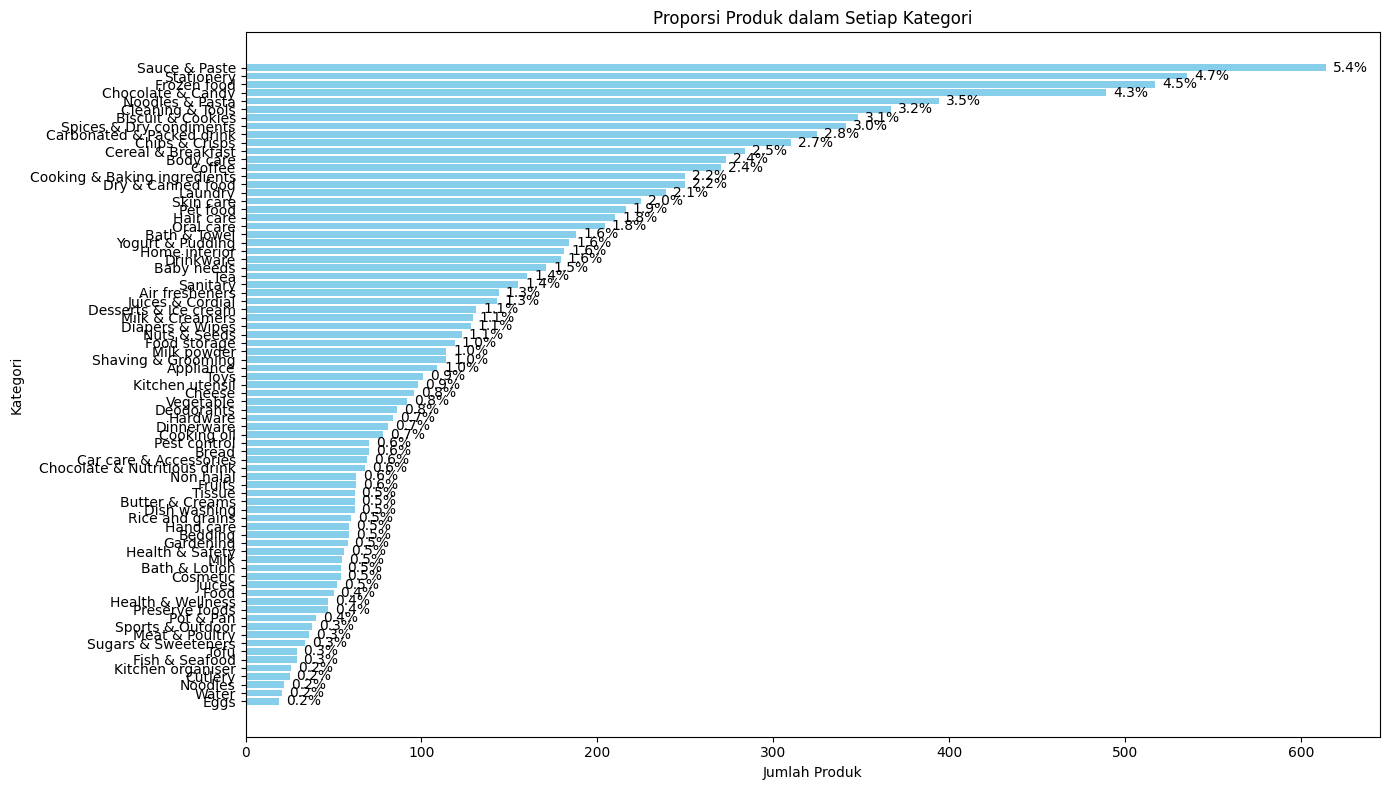

In [21]:
# count the number of products in each category
category_counts = df['category'].value_counts()

# prepare data for visualization
categories = category_counts.index
product_counts = category_counts.values

# do visualization using matplotlib
plt.figure(figsize=(14, 8))
bars = plt.barh(categories, product_counts, color='skyblue')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.title('Proporsi Produk dalam Setiap Kategori')

# add percentage labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.gca().annotate(f'{width/product_counts.sum()*100:.1f}%', 
                 xy=(width, bar.get_y() + bar.get_height()/2), 
                 xytext=(5, 0), 
                 textcoords='offset points', 
                 fontsize=10, 
                 va='center')

plt.gca().invert_yaxis()  # for the largest bar to be at the top
plt.tight_layout()

# show the plot
plt.show()

## Initial Exploration of Building a Word2Vec Model for Word Representation in Text Data

Before running more complex text modeling models, such as neural networks, building word vector representations with the Word2Vec model can be a useful initial processing step.

In [22]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# tokenizing the title column
df['tokenized_title'] = df['title'].apply(lambda x: word_tokenize(str(x).lower()))

# make word2vec model
model = Word2Vec(df['tokenized_title'], vector_size=100, window=5, min_count=1, sg=0)
model.save("word2vec.model")
vector = model.wv['vintage']
print("Vektor kata 'vintage':", vector)

# show similar words to 'vintage'
similar_words = model.wv.most_similar('vintage', topn=5)
print("Words similar to 'vintage':", similar_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\penguin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vektor kata 'vintage': [-0.05085161  0.05561337  0.02436074  0.01901819  0.01406477 -0.09245821
 -0.00510908  0.0875686  -0.03418828 -0.03651581 -0.02804122 -0.08141914
 -0.00119554  0.02083367  0.0243509  -0.04251885  0.00896606 -0.06665456
 -0.0034705  -0.07602381  0.02041557  0.01068539  0.02622291 -0.01961552
 -0.01943343  0.01923814 -0.03390849 -0.01822082 -0.0615912   0.00779277
  0.06450057  0.01116683  0.00088866 -0.0353699  -0.01025601  0.05009558
  0.01195468 -0.02738401 -0.04007819 -0.06865057  0.01779835 -0.05187937
 -0.0163522  -0.01337203  0.03571188 -0.02390698 -0.02595671  0.00082571
  0.00812764  0.02478191  0.0214264  -0.04582451 -0.01458744 -0.02217794
 -0.02818434  0.03817397  0.04023993 -0.0047824  -0.04305114  0.00456002
  0.0028384   0.01934252  0.00107975 -0.00550083 -0.0441036   0.04781939
  0.0163944   0.03014783 -0.04488334  0.06239631 -0.0253454   0.03226863
  0.04390054 -0.00940437  0.05811884  0.04736348 -0.01572479 -0.01233265
 -0.04551965  0.01314176 -0.

In [23]:
vector = model.wv['glass']
print("Word vector 'glass':", vector)

# find words similar to a specific word
similar_words = model.wv.most_similar('glass', topn=5)
print("Words similar to 'Glass':", similar_words)

Vektor kata 'glass': [-0.3006013   0.27305728  0.10491706  0.04861466  0.04068478 -0.48674276
 -0.0420634   0.51054037 -0.18699135 -0.1889448  -0.17407842 -0.46899822
 -0.06294487  0.16942503  0.08617733 -0.21572311  0.06182367 -0.36651593
  0.03253489 -0.48068193  0.12997736  0.07524426  0.19802599 -0.13942562
 -0.0670536   0.10795455 -0.16748525 -0.1304457  -0.30853713  0.0193004
  0.32381427  0.04258387  0.01893181 -0.17307813 -0.0321305   0.27040797
  0.04918912 -0.17140561 -0.18091838 -0.41683885  0.0831655  -0.28062353
 -0.13270259 -0.09376056  0.20742893 -0.11732784 -0.19910344 -0.04514331
  0.08121444  0.11878218  0.13074541 -0.21604297 -0.08620293 -0.09573713
 -0.1869758   0.17588319  0.19038925 -0.02744732 -0.204901    0.06651005
 -0.00587576  0.12371347  0.01191903 -0.01837752 -0.30711806  0.21239685
  0.15121825  0.1546643  -0.2718655   0.37935978 -0.10250895  0.16547658
  0.2571006   0.006184    0.31521505  0.23267977 -0.13676535 -0.01726459
 -0.27434665  0.10743049 -0.168

## Exploring Text Data Clustering with K-Means Using TF-IDF Feature Extraction and Visualization with PCA

By combining feature extraction, clustering, and visualization, we can gain better insights into the structure of text data, which can be used for various analysis and modeling purposes.

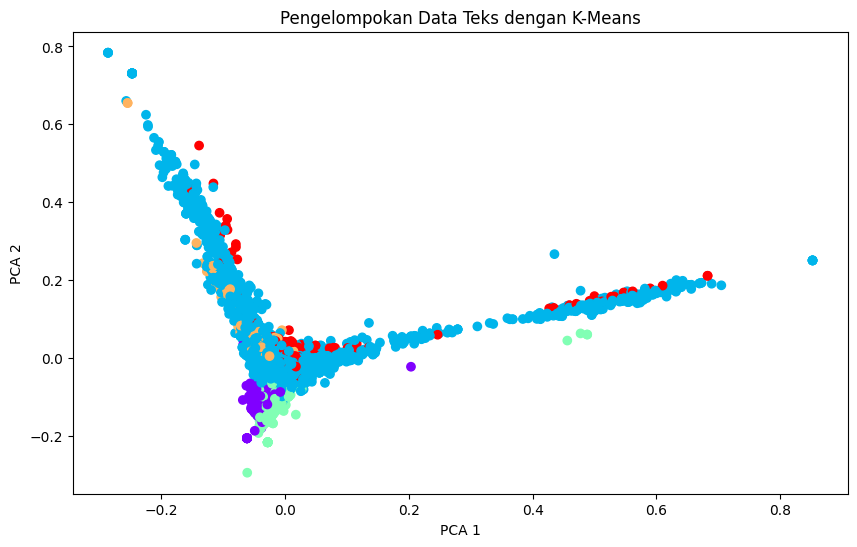

Cluster 1:
- CP Plus Koread Fried Chicken
- Felix Sensations Chicken & Spinach Pouch
- Milna Baby Cereal Chicken & Carrot Soup
- CP Crispy Chicken Finger (with DHA)
- A1 Emperor Herbs Chicken Spices
- Gourmet Chef Chicken Salami
- Four Seas Herbal Chicken Bowl Instant Noodle
- Ramly Chicken Ball
- Jerky Time For Dog Chicken Stick
- Samyang Hot Chicken Rose Flavour Ramen
- Iams Proactive Health Healthy Adult With Chicken
- Thins Chicken Potato Chips
- Samyang Hot Chicken Quattro Cheese Ramen
- Boramchan BKFC Sweet & Spicy Boneless Fried Chicken
- Topvalu Bestprice Chicken Based Bonito & Tuna Cat Food
- Smart Heart Pouch Chicken With Rice & Cheese
- Ayamas Chicken Curry With Potato Original
- Uncle Sun Ginseng Cordyceps Flower With Chicken Special Soup
- Captain Instant Oat Porridge Pack Chicken Mushroom
- Myojo Chicken Tanmen Nooldes
- Maggi Concentrated Chicken Stock
- Masterfoods Roast Chicken Seasoning
- Yeo's Curry Chicken
- Take One Baby Bites Chicken With Vegetable Flavour
- Yeo's

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# extract features from the title column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['title'])

# using KMeans to cluster the data
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(tfidf_matrix)
df['cluster'] = kmeans.labels_

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='rainbow')
plt.title('Pengelompokan Data Teks dengan K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

for i in range(5):  
    cluster_samples = df[df['cluster'] == i]['title'].values
    print(f'Cluster {i + 1}:')
    for title in cluster_samples:
        print(f'- {title}')

## Create a Word Cloud from Product Titles

A Word Cloud is a visual representation of the most common words appearing in a text, where the size of each word indicates how frequently it appears. A Word Cloud provides a visualization of the most frequently occurring words in product titles. This helps in identifying keywords that are often used in products, offering insights into the focus or trends in the product list.

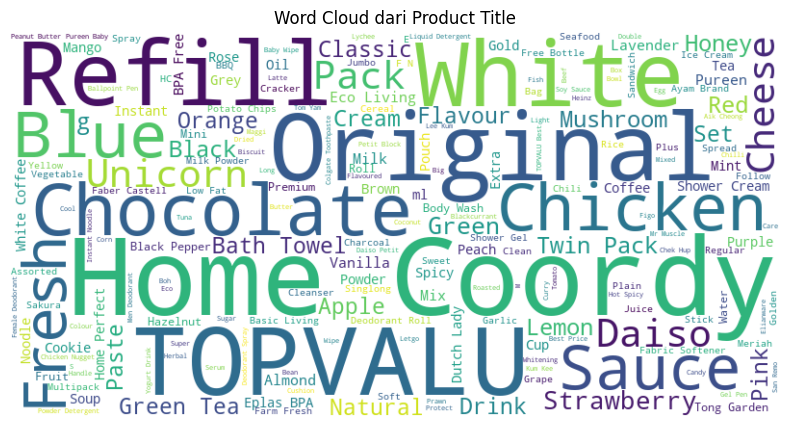

In [26]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# show word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud dari Product Title")
plt.show()